Coefficients are:  [2.47939442 0.06515603]


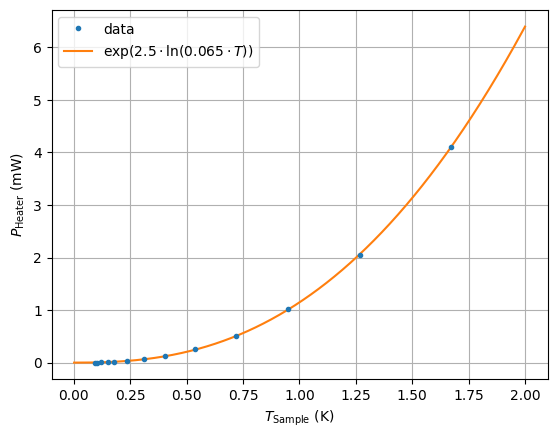

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def functiuon(x,a,b):
    return np.exp(a*np.log(b*x))

P = np.array([1,2,4,8,16,32,64,128,256,512,1024,2048, 4096])*1e-6
T = np.array([95, 103, 120, 150, 180, 236, 310, 405, 535, 720, 950, 1270, 1670])/1000

popt, pcov = curve_fit(functiuon, T, P, bounds=(0, [5, .5]))
print('Coefficients are: ',popt)

nu_T = np.linspace(.001, 2.0, 2000)
nu_P = functiuon(nu_T, *popt)

plt.plot(T,P*1e3, '.', label='data', zorder=10)
plt.plot(nu_T, nu_P*1e3,'-', label=rf"$\exp({popt[0]:.1f} \cdot \ln({popt[1]:.3f}\cdot T))$")
plt.xlabel(r'$T_\mathrm{Sample}$ (K)')
plt.ylabel(r'$P_\mathrm{Heater}$ (mW)')
plt.grid()
plt.legend()